# 8장. 텍스트 분석

* [8.1. 텍스트 분석 이해](#8.1.)
* [8.2. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화](#8.2.)
* [8.3. Bag of Words - BOW](#8.3.)
* [8.4. 텍스트 분류 실습 - 20 뉴스그룹 분류](#8.4.)
* [8.5. 감성 분석](#8.5)
* [8.6. 토픽 모델링 - 20 뉴스그룹](#8.6.)
* [8.7. 문서 군집화 실습 - Opinion Review](#8.7.)
* [8.8. 문서 유사도](#8.8.)
* [8.9. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석](#8.9.)
* [8.10. 캐글 Mercari Price Suggestion Challenge](#8.10.)

<div id='8.1.'/>

## 8.1. 텍스트 분석 이해

* NLP(Natural Language Processing)과 텍스트 분석(Text Analytics) 
   * NLP: 머신이 인간의 언어를 이해하고 해석하는 데 더 중점을 두고 기술이 발전
      * NLP는 텍스트 분석의 성능을 더 높이는 기반 기술이라고 볼 수 있다.
      * NLP 기술이 발전함에 따라 텍스트 분석도 더욱 정교하게 발전할 수 있다.
   * Text Analytics: 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 더 중점을 두고 기술이 발전

<div id='8.2.'/>

## 8.2. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

### 텍스트 토큰화

* 문장 토큰화

In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /Users/gritmind/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


* 단어 토큰화

In [2]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


* 문장 & 단어 토큰화

In [3]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


* 문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시된다.
* 이 문제를 조금이라도 해결하기 위해서 n-gram이 사용된다.

### Stopword 제거

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gritmind/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [6]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming & Lemmatization

* 모두 원형 단어를 찾는다는 목적은 같다.
* Lemmatizing은 언어 리소스와 품사 정보를 활용하여 정확한 어근 단어를 찾아준다. (속도는 느리다)
* 반면, stemming은 단순한 문법 규칙을 기반으로 원형 단어를 찾는다. (속도는 빠르다)

In [7]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gritmind/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


<div id='8.3.'/>

## 8.3. Bag of Words - BOW

* BOW 모델의 장점은 쉽고 빠른 구축에 있다. 단순히 단어의 발생 횟수에 기반하지만 예상보다 문서의 특징을 잘 나타낸다.
* BOW 모델의 단점은 다음과 같다.
   * 문맥 의미(Semantic Context) 반영 부족
   * 희소 행렬 문제(벡터의 회소성)
   
   
* BOW 피처 벡터화
   * one-hot encoding
   * count 기반 벡터화
   * tf-idf 기반 벡터화
   
   
* 사이킷런에서 Count / TFIDF 벡터화
   * CountVectorizer - 피처 벡터화뿐만 아니라 수문자 일괄 변환, 토큰화, stopword 필터링 등의 텍스트 전처리도 함께 수행
      * max_df: 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어를 제외하기 위한 파라미터
      * min_df: 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어를 제외하기 위한 파라미터
      * max_features: 추출하는 피처의 개수를 제한. (ex. 2000이면, 가장 높은 빈도를 가지는 단어순으로 2000개까지만 피처로 추출)
      * stop_words: 불용어 리스트 입력, (ex. 'english'라 지정하면 영어의 stopword 리스트 입력)
      * n_gram_range: 튜플 형태로 (범위 최솟값, 범위 최댓값)을 지정한다. (ex. (1, 2)이면 토큰화된 단어를 1개씩(최소), 그리고 순서대로 2개씩(최대) 묶어서 피처로 추출)
      * analyzer: 피처 추출을 수행할 단위를 지정 (디폴트: 'word'). Word가 아니라 character의 특정 범위를 피처로 만드는 특별한 경우에 사용)
      * token_pattern: 토큰화를 수행하는 정규 표현식 패턴을 지정. (디폴트: `'\b\w\w+\b`로 '공백단어공백'으로 분리하는 토크나이저) 디폴트를 변경할 경우는 거의 없음.
      * tokenizer: 토큰화를 별도의 커스텀 함수로 이용시에 적용.
   * TfidfVectorizer

### BOW 벡터화를 위한 희소 행렬

* 사이킷런의 CountVectorizer/TfidfVectorizer는 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형태의 희소 행렬로 반환한다.
* BOW 벡터는 대부분 0으로 구성된 희소 행렬이다. 0이라도 하나의 값으로 메모리 공간에 할당된다. BOW 벡터의 크기는 매우 크기 때문에 이는 매우 비효율적이다.
* 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 반환해야 한다. 대표적인 방법으로 COO 형식과 CSR 형식이 있다.
* 일반적으로 큰 희소 행렬을 저장하고 계산을 수행하는 능력이 CSR 형식이 더 뛰어나므로 CSR을 많이 사용한다.

#### 회소 행렬 - COO 형식

* COO(Coordinate) 형식은 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열에 저장하는 방식이다.

In [9]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], [0, 2, 0 ] ] )

In [10]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
# 위 예제에서 0이 아닌 데이터 개수는 3개 이므로, 각각 3 크기의 벡터가 된다.
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [11]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

#### 회소 행렬 - CSR 형식

* CSR(Compressed Sparse Row) 형식은 COO 형식이 행과 열의 위치를 나타내기 위해 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식이다.

<img src="./images/pic_8_1.png" width="80%" height="80%">

* 위 그림은 COO 형식을 나타낸다.
* 행 위치 배열을 보면 순차적으로 같은 인덱스를 반복해서 나타내는 걸 알 수 있다.
* 행 위치 배열이 0부터 순차적으로 증가하는 값으로 이뤄졌다는 특성을 고려하면 행 위치 배열의 고유한 값의 사작 위치만 표기하는 방법으로 이러반 반복을 제거할 수 있다. (즉, 위치의 위치를 표현)
* CSR는 Compressed Sparse Row의 약자이며, 이처럼 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식을 의미한다.
* 아래 그림은 CSR 형식을 나타낸다.

<img src="./images/pic_8_2.png" width="80%" height="80%">

* 맨 매자막에 데이터의 총 개수를 배열에 추가한다.
* 이렇게 고유 값의 시작 위치만 알고 있으면 COO 방식보다 메모리가 적게 들고 빠른 연산이 가능하다.

In [12]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


* 실제 사용 시에는 다음과 같은 dense3 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성한다.

In [13]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

* 사이킷런의 CountVectorizer나 TfidfVectorizer 클래스로 변환된 피처 벡터화 행렬은 모두 scipy의 CSR 형태의 희소 행렬이다.

<div id='8.4.'/>

## 8.4. 텍스트 분류 실습 - 20 뉴스그룹 분류

### 텍스트 정규화

In [14]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)

In [15]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [16]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [17]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

* 텍스트 데이터를 확인해 보면 뉴스그룹 기사의 내용뿐만 아니라 뉴스그룹 제목, 작성자, 소속, 이메일 등의 다양한 정보가 있다.
* 이 중에서 내용을 제외하고 제목 등 다른 정보는 제거한다.
* 제목과 소속, 이메일 주소 등의 헤더와 푸터 정보들은 뉴스그룹 분류의 타겟 클래스 값과 유사한 데이터를 가지고 있는 경우가 많다. 이 피처들을 포함하면 왠만한 ML 알고리즘을 적용해도 상당히 높은 예측 성능을 나타낸다.

In [18]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


### 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

* CountVectorizer를 적용할 때는 학습 데이터로 fit & transform하고, 테스트 데이터는 tranform할 때만 사용한다.

* CountVectorizer 기반 LogisticRegression

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
# 개정판 소스 코드 변경(2019.12.24)
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.608


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


* TfidfVectorizer (기본) 기반 LogisticRegression

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.674


* TfidfVectorizer (stopword, ngram) 기반 LogisticRegression

In [22]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.692


* GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정. 
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3, scoring='accuracy', verbose=1, n_jobs=5)
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가. 
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

### 사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합

* 사이킷런의 Pipeline 클래스를 이용하면 피처 벡터화와 ML 알고리즘 학습/예측을 위한 코드 작성을 한 번에 진행할 수 있다.
* Pipeline을 이용하면 데이터의 전처리와 머신러닝 학습 과정을 통일된 API 기반에서 처리할 수 있다.
* 대용량 데이터의 피처 벡터화 결과를 별도 데이터로 저장하지 않고 스트림 기반에서 바로 머신러닝 알고리즘의 데이터로 입력할 수 있기에 수행 시간을 절약할 수 있다.
* 일반적으로 사이킷런 Pipeline은 텍스트 기반의 피처 벡터화뿐만 아니라 모든 데이터 전처리 작업과 Estimator를 결합할 수 있다.
* pipeline.fit 과 pipeline.predict 만 수행하면 된다.

In [27]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능. 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.701


* Pipeline 기반에서도 하이퍼 파라미터 튜닝을 GridSearchCV 방식으로 진행할 수 있다.
* 파라미터 변수는 헤깔릴 수 있는데 언더바 2개를 연달아 붙여 파라미터 정의와 실제 이름을 구분할 수 있다.
* Pipeline 기반 하이퍼 파라미터 튜닝은 너무 많은 경우의 수가 발생하기 쉬우니 주의를 해야 한다.

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정. . 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1,5,10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

<div id='8.5.'/>

## 8.5. 감성 분석

### 지도학습 기반 감성 분석 실습 - IMDB 영화평

* .tsv 파일은 탭('\t')으로 분리된 파일인데, 판다스의 read_csv()에 sep='\t'을 명시해주면 된다.

In [30]:
import pandas as pd

review_df = pd.read_csv('./labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(5)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [31]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

* `<br>` html 태그 제거
* 영어가 아닌 숫자/특수문자 제거

In [32]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

In [33]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

* Pipeline - CountVectorizer & LogisticRegression

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용하여 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.  
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


예측 정확도는 0.8860, ROC-AUC는 0.9503


* Pipeline - TfidfVectorizer & LogisticRegression

In [35]:
# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


### 비지도학습 기반 감성 분석 소개

* 학습 데이터가 없기 때문에 비지도 감성 분석은 Lexicon을 기반으로 한다.
* Lexicon은 일반적으로 어휘집을 의미한다. 여기서는 주로 감성 분석을 위해 감성 어휘 사전이라 생각하자.
* 감성 사전은 긍정 감성 또는 부정 감성의 정도를 의미하는 수치를 가지고 있으며 이를 감성 지수(Polarity score)라 한다.
* 이 감성 지수는 단어의 위치나 주변 단어, 문맥, POS 등을 참고해 결정된다.


* WordNet
   * 단순한 어휘 사전이 아닌 시맨틱 분석을 제공하는 어휘 사전이다.
   * 다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공
   * 각각의 품사(명사, 동사, 형용사, 부사 등)로 구성된 개별 단어를 Synset(Sets of cognitive synonyms)이라는 개념으로 표현
   * Synset은 단순한 하나의 단어가 아니라 그 단어가 가지는 문맥, 시맨틱 정보를 제공하는 WordNet의 핵심 개념
   
   
* 감성사전
   * SentiWordNet (예측 정확도가 그리 높지 않아 잘 사용하지 않음)
      * WordNet의 Synset 개념을 감성 분석에 적용한 것이다.
      * WordNet의 Synset별로 3가지 감성 점수(sentiment score)를 할당한다. (긍정 감성 지수, 부정 감성 지수, 객관성 지수)
      * 문장별로 단어들의 긍정 감성 지수와 부정 감성 지수를 합산하여 최종 감성 지수를 계산하고 이에 기반해 감성이 긍정인지 부정인지 결정한다.
   * VADER
      * 주로 소셜 미디어의 텍스트에 대한 감성 분석을 위한 패키지이다.
      * 뛰어난 감성 분석 결과를 제공하며, 비교적 빠른 수행 시간을 보장해 대용량 텍스트 데이터에 잘 사용된다.
   * Pattern
      * 예측 성능 측면에서 가장 주목받는 패키지이다.
      * 파이썬 2.x에서만 동작하고 있음.

#### WordNet 소개

* 특정 단어에 대한 synsets 추출 가능

In [36]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성. 
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 갯수:', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 갯수: 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


* synsets 객체는 품사(POS), 정의(Definition), 부명제(Lemma) 등으로 시맨틱적인 요소를 표현할 수 있다.

In [37]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemmas:',synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

* WordNet은 어휘 사이의 유사도를 측정할 수 있다.
* synset 객체는 단어 간의 유사도를 나타내기 위해서 path_similarity() 메서드를 제공한다.

In [38]:
# synset 객체를 단어별로 생성합니다. 
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정합니다. 
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장합니다.  
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


#### SentiWordNet을 이용한 감성분석

In [39]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 갯수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


* SentiSynset 객체는 단어의 감성을 나타내는 감성 지수와 객관성(감성과 반대)을 나타내는 객관성 지수를 가진다.
* 감성 지수는 다시 긍정 감성 지수와 부정 감성 지수로 나뉜다.

In [40]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous .pos_score())
print('fabulous 부정감성 지수: ',fabulous .neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


* SentiWordNet / WordNet을 이용하기 위해서 어근 추출과 품사 태깅을 해야 한다.

In [41]:
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 

* 다음은 일종의 Lexicon 기반 (SentiWordNet) 감성 분류기이다.

In [43]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [44]:
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix( y_target, preds))
print("정확도:", np.round(accuracy_score(y_target , preds), 4))
print("정밀도:", np.round(precision_score(y_target , preds),4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


#### VADER를 이용한 감성 분석

* 설치: NLTK 패키지 - nltk.download('all') OR pip install vaderSentiment

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


* 'compound'는 neg, neu, pos score를 적절히 조합해 -1에서 1 사이의 감성 지수를 표현한 값이다.
* compound score를 기반으로 부정 감성 또는 긍정 감성 여부를 결정한다.
* 보통 0.1 이상이면 긍정 감성, 그 이하이면 부정 감성으로 판단하나 상황에 따라 이 임계값을 적절히 조정해 예측 성능을 조절한다.

In [47]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix( y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target , vader_preds),4))
print("정밀도:", np.round(precision_score(y_target , vader_preds),4))
print("재현율:", np.round(recall_score(y_target, vader_preds),4))

[[ 6736  5764]
 [ 1867 10633]]
정확도: 0.6948
정밀도: 0.6485
재현율: 0.8506


#### pattern 패키지를 통한 감성 분석

https://www.clips.uantwerpen.be/pattern

<div id='8.6.'/>

## 8.6. 토픽 모델링 - 20 뉴스그룹

* 토픽 모델링(Topic Modeling)이란 문서 집합에 숨어 있는 주제를 찾아내는 것이다.
* 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.

* 20 뉴스그룹 데이터셋에 토픽 모델링 적용
* 20개 주제 중 8개 주제(모토사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학)만 사용
* 사이킷런은 LDA(Latent Dirichlet Allocation) 기반의 토픽 모델링을 제공
* 텍스트를 Count 기반으로 벡터화 실시

In [48]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

#LDA 는 Count기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


* 토픽의 개수는 50개로 한다. (원래 문서 임베딩이 1000차원임을 감안)

In [52]:
lda = LatentDirichletAllocation(n_components=50, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=50, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

* 문서 기준에서는 각 문서 임베딩을 이제 50 차원으로 표현할 수 있게 된다.

In [ ]:
# ...

* 토픽 기준에서는 각 토픽마다 1000개의 word 피처와 해당 토픽 사이의 연관도 값을 가진다.
   * 즉, components_array의 3번째 row, 10번째 col에 있는 값은 <br>
     3번째 토픽에 대해서 피처 벡터화된 행렬에 10번째 칼럼에 해당하는 피처가 <br>
     3번째 토픽에 연관되는 수치 값을 가진다. (일종의 해당 word가 해당 토픽에 열마나 연관있는지에 대한 점수라 볼 수 있음)
   * lda_model.components_ 값만으로는 각 토픽별 word 연관도를 보기 어렵다. <br>
     display_topics() 함수를 정의해서 각 토픽별로 연관도가 높은 순으로 word를 나열해보자.

In [53]:
print(lda.components_.shape)
lda.components_

(50, 1000)


array([[3.97655679e+01, 6.77813814e+01, 5.12264658e+00, ...,
        2.00000000e-02, 6.06076574e-01, 1.34933645e+01],
       [2.00000000e-02, 2.00000000e-02, 2.00000000e-02, ...,
        2.00000000e-02, 2.00000000e-02, 2.00000000e-02],
       [2.00000000e-02, 2.00000000e-02, 2.00000000e-02, ...,
        4.52327875e+00, 2.00000000e-02, 2.00000000e-02],
       ...,
       [1.13438745e+00, 1.37674013e+01, 2.00000000e-02, ...,
        2.00000000e-02, 2.22180080e+02, 6.93756191e+00],
       [2.00000000e-02, 2.34927520e+01, 2.00000000e-02, ...,
        2.00000000e-02, 6.40363130e-01, 1.07243758e+00],
       [2.00000000e-02, 2.00000000e-02, 2.00000000e-02, ...,
        5.37015233e-01, 2.00000000e-02, 3.05567918e+00]])

In [51]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


<div id='8.7.'/>

## 8.7. 문서 군집화 실습 - Opinion Review

* UCI 머신러닝 레포지토리 - Opinion Revew 데이터셋
* https://archive.ics.uci.edu/ml/datasets/Opinosis+Opinion+%26frasl%3B+Review
* 51개의 텍스트 파일. 각 파일은 호텔, 자동차, 전자제품 사이트에서 가져온 리뷰 문서이다.
* 각 문서는 약 100개 정도의 문장을 가진다.
* 원래 토픽 모델링 논문으로 사용된 데이터이지만 여기서는 문서 군집화를 이용해 각 리뷰를 분류해본다.

In [54]:
import pandas as pd
import glob ,os

# 아래는 제 컴퓨터에서 압축 파일을 풀어 놓은 디렉토리이니, 여러분의 디렉토리를 설정해 주십시요  
path = r'/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1.0/topics'                     
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,short battery life I moved up from a...
1,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Ride seems comfortable and gas mileage fa...
2,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"We arrived at 23,30 hours and they could n..."
3,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Great location for tube and we crammed in...
4,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Staff are friendly and hel...


* 문서에 tf-idf 형태로 피처 벡터화 실시

In [55]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


* K-평균 군집화 실시 (5개 클러스터로 일단 실시)

In [57]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [58]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,short battery life I moved up from a...,4
1,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Ride seems comfortable and gas mileage fa...,3
2,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"We arrived at 23,30 hours and they could n...",1
3,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Great location for tube and we crammed in...,1
4,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Staff are friendly and hel...,1


In [59]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Mediocre room and service for a very extr...,0
16,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Both of us having worked in tourism for o...,0
17,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,The room was packed to capacity with queu...,0
27,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"not customer, oriented hotelvery low servi...",0
32,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,The food for our event was deli...,0


In [60]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"We arrived at 23,30 hours and they could n...",1
3,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Great location for tube and we crammed in...,1
4,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Staff are friendly and hel...,1
20,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,The staff at Swissotel were not particula...,1
28,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"All in all, a normal chain hotel on a nice...",1
30,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,The Swissotel is one of our favorite hotel...,1
31,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"The room was not overly big, but clean and...",1
39,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"Good Value good location , ideal ...",1
46,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"Great Location , Nice Rooms , Helpless...",1
49,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,The wine reception is a great idea as it i...,1


In [61]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
5,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,The voice prompts and maps are wonderful ...,2
41,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"If a case was included, as with the Kindle...",2
40,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"Windows 7 is quite simply faster, more sta...",2
38,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"In fact, the entire navigation structure h...",2
37,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Keep in mind that once you get in a room ...,2
36,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,It feels as easy to read as the K1 but doe...,2
34,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,You also get upscale features like spoken ...,2
26,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,I thought it would be fitting to christen ...,2
25,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"As always, the video screen is sharp and b...",2
21,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"I had to uninstall anti, virus and selecte...",2


In [62]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Ride seems comfortable and gas mileage fa...,3
18,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"Drivers seat not comfortable, the car its...",3
22,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"First of all, the interior has way too ma...",3
23,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"After slowing down, transmission has to b...",3
29,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Front seats are very uncomfor...,3
35,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"It's quiet, get good gas mileage and look...",3
42,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,I previously owned a Toyota 4Runner which ...,3
43,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Ride seems comfortable and gas mileage fa...,3
45,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,I love the new body style and the interior...,3
47,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"Very happy with my 08 Accord, performance i...",3


In [63]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,short battery life I moved up from a...,4
9,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,After I plugged it in to my USB hub on my ...,4
11,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",4
14,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"I bought the 8, gig Ipod Nano that has the...",4
15,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,The Eee Super Hybrid Engine utility lets u...,4
24,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,headphone jack i got a clear case for it a...,4
33,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,", and is very, very acc...",4


* K-평균 재실시 (3개로)

In [64]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화 
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
45,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,I love the new body style and the interior...,0
22,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"First of all, the interior has way too ma...",0
23,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"After slowing down, transmission has to b...",0
42,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,I previously owned a Toyota 4Runner which ...,0
43,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Ride seems comfortable and gas mileage fa...,0
35,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"It's quiet, get good gas mileage and look...",0
18,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"Drivers seat not comfortable, the car its...",0
29,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Front seats are very uncomfor...,0
1,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,Ride seems comfortable and gas mileage fa...,0
47,/Users/gritmind/Dropbox/book/code/pymldg_rev/8...,"Very happy with my 08 Accord, performance i...",0


### 군집별 핵심 단어 추출하기

* 각 군집에 속한 문서는 핵심 단어를 주축으로 군집회되어 있을 것이다.
* KMeans 객체는 각 군집을 구성하는 단어 피처가 군집의 중심(centroid)을 기준으로 얼마나 가깝게 위치해 있는지 clusters_centers_ 라는 속성으로 제공한다.
   * cluster_centers_는 배열로 행은 개별 군집을 열은 개별 피처를 의미한다.

In [65]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 2409)
[[0.         0.00137309 0.         ... 0.         0.         0.        ]
 [0.         0.00170335 0.0025537  ... 0.0032582  0.00349413 0.        ]
 [0.01819865 0.         0.         ... 0.         0.         0.00471073]]


* `ndarray의 argsort()[::-1]`를 이용하면 clsuter_centers 배열 내 값이 큰 순으로 정렬된 위치 인덱스 값을 반환한다.

In [66]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [67]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [68]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'car', 'gas', 'transmission', 'gas mileage', 'ride', 'comfort']
Reviews 파일명 : ['/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1', '/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1', '/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1', '/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1', '/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1', '/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1', '/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'location', 'staff', 'food', 'clean', 'bathroom', 'parking', 'room wa']
Reviews 파일명 : ['/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1', '/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1', '/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDatas

<div id='8.8.'/>

## 8.8. 문서 유사도

* 문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도(cosine similarity)를 사용한다.
* 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다.

<img src="./images/pic_8_3.png" width="60%" height="60%">

* 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유는?
   * 문서를 피처 벡터화하면 차원이 매우 많은 희소 행렬이 된다.
   * 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표(ex. 유클리디안 거리)는 정확도가 떨어지기 쉽다.
   * 또한, 문서가 매우 긴 경우 단어의 빈도수도 더 많을텐데 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없다.
   * 그런데 사실, 0-1 로 정규화를 실시한다면 유클리디안 거리를 사용해도 상관없지 않나?

In [69]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [71]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [72]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


* 사이킷런은 코사인 유사도를 측정하기 위해 sklearn.metrics.pairwise.cosine_similarity API를 제공한다.

In [73]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [75]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Revew 데이터셋을 이용한 문서 유사도 측정

In [76]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

* tf-idf 벡터화 & K-평균 군집화

In [93]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/Users/gritmind/Dropbox/book/code/pymldg_rev/8장/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


* 호텔 군집화 라벨 필터링 & 문서마다 코사인 유사도 측정

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([2, 3, 4, 13, 16, 17, 20, 27, 28, 30, 31, 32, 39, 46, 49, 50], dtype='int64')
##### 비교 기준 문서명  room_holiday_inn_london  와 타 문서 유사도######
[[1.         0.11953564 0.11947927 0.33260345 0.22157908 0.13280487
  0.13191696 0.28864675 0.23102858 0.76564916 0.57253197 0.12728441
  0.12431247 0.80339226 0.07076636 0.08047641]]


* 문서 간에 유사도가 높은 순으로 정렬 및 시각화

Text(0.5, 1.0, 'room_holiday_inn_london')

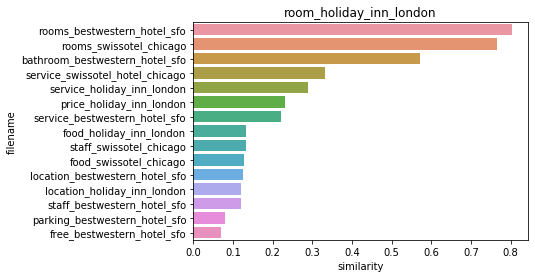

In [95]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

<div id='8.9.'/>

## 8.9. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

* 한글 NLP 처리의 어려움
   * 띄어쓰기
   * 다양한 조사
   
   
* 네이버 영화 평점 데이터
   * https://github.com/e9t/nsmc

In [97]:
import pandas as pd

train_df = pd.read_csv('nsmc-master/ratings_train.txt', sep='\t')
train_df.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [98]:
train_df['label'].value_counts( )

0    75173
1    74827
Name: label, dtype: int64

* 숫자/null은 공백으로 치환

In [100]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('nsmc-master/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 개정판 소스 코드 변경(2019.12.24)
train_df.drop('id', axis=1, inplace=True) 
test_df.drop('id', axis=1, inplace=True)

* Twitter 한국어 형태소 분석기 - SNS 분석에 적합

In [101]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


* TFIDF 벡터화

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


* Logistic Regression & GridSearchCV

In [ ]:
# Logistic Regression 을 이용하여 감성 분석 Classification 수행. 
lg_clf = LogisticRegression(random_state=0)

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

* 테스트 데이터에 학습 데이터로 학습한 tfidf 모델을 적용해야 한다.

In [ ]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함. 
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))

<div id='8.10.'/>

## 8.10. 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge

* Mercari Price Suggestion Challenge, 일본의 대형 온라인 쇼핑몰인 Mercari사의 제품에 대해 가격을 예측하는 과제
* 제공되는 데이터셋은 제품에 대한 여러 속성 및 제품 설명 등의 텍스트 데이터로 구성
* Mercari사는 이러한 데이터를 기반으로 제품 예상 가격을 판매자들에게 제공하고자 함
* https://www.kaggle.com/c/mercari-price-suggestion-challenge/data


* 제공되는 데이터셋의 속성은 다음과 같다.
   * train_id: 데이터 아이디
   * name: 제품명
   * item_condition_id: 판매자가 제공하는 제품 상태
   * category_name: 카테고리 명
   * brand_name: 브랜드 이름
   * price: 제품 가격. 예측을 위한 타깃 속성
   * shipping: 배송비 무료 여부. 1이면 무료(판매자가 지불), 0이면 유료(구매자가 지불)
   * item_description: 제품에 대한 설명
   
   
* 회귀로 피처를 학습한 후에 price를 예측하는 문제이다.
* Mercari Price Suggestion은 기존 회귀 예제와 다른 점은 item_description과 같은 텍스트 형태의 비정형 데이터와 다른 정형 속성을 같이 적용해 회귀를 수행한다는 점이다.

### 데이터 전처리

In [117]:
from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pandas as pd

#mercari_df= pd.read_csv('mercari_train.tsv',sep='\t')
mercari_df= pd.read_csv('mercari-price-suggestion-challenge/train.tsv',sep='\t')
print(mercari_df.shape)
mercari_df.head(5)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


* brand_name 칼럼이 매우 많은 null 값을 가지고 있다.

In [118]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


* 회귀에서 target 값의 정규 분포도는 매우 중요하다. 살펴보자.

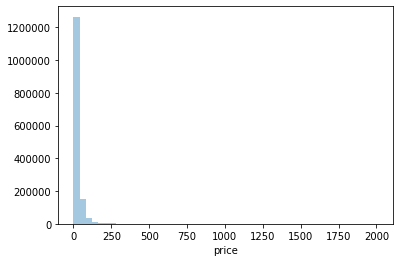

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df,kde=False)

* 왜곡된 target 분포도에 로그 변환을 시켜주자.

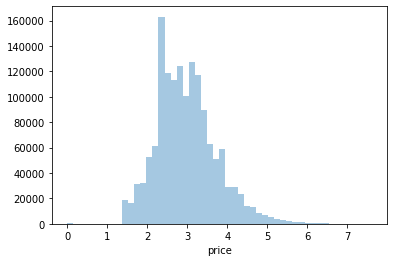

In [120]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df,kde=False)

In [121]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

* 피처들의 분포도 살펴보자.

In [122]:
print('Shipping 값 유형:\n',mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n',mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


* item_decsription은 문자열이므로 null은 다양한 형태로 나타날 수 있다.
* null 처리를 하기 전에 null 정규화 작업이 필요하다.

In [123]:
boolean_cond= mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

* 카테고리 명은 대,중,소를 분할하자. (ex. 남자/상의/티셔츠 -> 대분류:남자, 중분류:상의, 소분류:티셔츠)
* 아래 apply lambda는 리스트를 반환한다. 리스트의 엘리먼트 하나하나를 변수에 할당하고 싶으면 zip과 `*`를 사용한다.

In [124]:
# apply lambda에서 호출되는 대,중,소 분할 함수 생성, 대,중,소 값을 리스트 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except: 
        # category_name이 null인 경우 예외를 발생시킴.
        return ['Other_Null' , 'Other_Null' , 'Other_Null']

# 위의 split_cat( )을 apply lambda에서 호출하여 대,중,소 컬럼을 mercari_df에 생성. 
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
                        zip( *mercari_df['category_name'].apply(lambda x : split_cat(x)) )

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 갯수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 갯수 :', mercari_df['cat_jung'].nunique())
print('소분류 갯수 :', mercari_df['cat_so'].nunique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 갯수 : 114
소분류 갯수 : 871


* null 처리

In [125]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

# 각 컬럼별로 Null값 건수 확인. 모두 0가 나와야 합니다.
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 피처 인코딩과 피처 벡터화

* Mercari Price Suggestion에 이용되는 데이터셋은 문자열 칼럼이 많다.
* 이 문자열 칼럼 중 레이블 또는 원-핫 인코딩을 수행하거나 피처 벡터화로 변환할 칼럼을 선별해야 한다.
* 선형 회귀의 경우 원-핫 인코딩 적용이 훨씬 선호된다. 따라서, 인코딩할 피처는 모두 원-핫 인코딩으로 한다.
* 피처 벡터화의 경우
   * 비교적 짧은 텍스트의 경우는 Count 기반의 벡터화를
   * 비교적 긴 텍스트의 경우는 TF-IDF 기반의 벡터화를 적용하자.

* 브랜드명 원-핫 인코딩 변환 (4810건 정도는 괜찮다. 브랜드명이 매우 많으면 다른 인코딩을 고려해야 한다)

In [126]:
print('brand name 의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name 의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


* 전체 중 고유한 상품명은 `1225273/1482535` 이기에 거의 고유한 상품명을 가진다고 볼 수 있다.
* Name 속성은 유형이 매우 많고, 적은 단어 위주의 텍스트이므로 Count 기반으로 피처 벡터화를 실시한다.

In [127]:
print('name 의 종류 갯수 :', mercari_df['name'].nunique())
print('name sample 7건 : \n', mercari_df['name'][:7])

name 의 종류 갯수 : 1225273
name sample 7건 : 
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


* item_description 컬럼의 평균 문자열 개수

In [129]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 개수
print('item_description 평균 문자열 개수:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:3]

item_description 평균 문자열 개수: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2                                                                    Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!
Name: item_description, dtype: object

* name 칼럼은 CountVectorizer로, item_description 칼럼은 TfidfVectorizer로 변환한다.

In [130]:
# name 속성에 대한 feature vectorization 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description 에 대한 feature vectorization 변환 
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range= (1,3) , stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:',X_name.shape)
print('item_description vectorization shape:',X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


* category_name 칼럼인 대,중,소분류 세 개의 칼럼 모두 원-핫 인코딩 변환
* shipping 칼럼 원-핫 인코딩 변환
* item_condition 칼럼 원-핫 인코딩 변환


* 희소 행렬을 기준으로 피처들을 hstack 함수를 사용해서 결합하자.
   * CountVectorizer와 TfidfVectorizer는 원래 희소 행렬로 출력한다.
   * LabelBinarizer는 희소 행렬 출력 옵션을 제공한다.
   
<img src="./images/pic_8_4.png" width="80%" height="80%">

In [131]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name= LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping= LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae= lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

* 인코딩 변환된 데이터셋은 CSR 형태인 csr_matrix 타입이다.

In [132]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand_shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


* 여기서는 결합한 데이터의 타입과 크기만 확인하고 메모리에서 삭제한다.
* 추후에 다양한 모델을 적용할 때마다 다시 결합해 해당 데이터셋을 이용하도록 한다.

In [133]:
from  scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id,
            X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# 사이파이 sparse 모듈의 hstack 함수를 이용하여 앞에서 인코딩과 Vectorization을 수행한 데이터 셋을 모두 결합. 
X_features_sparse= hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 셋이 메모리를 많이 차지하므로 사용 용도가 끝났으면 바로 메모리에서 삭제. 
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


60

### 릿지 회귀 모델 구축 및 평가

* RMSLE(Root Mean Sqaure Logarithmic Error)를 따로 정의
   * RMSLE는 RMSE와 유사하나 오류 값에 로그를 취한다.
   * 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 억제하기 위해서 이 방식을 도입
* 데이터 전처리에서 왜곡된 타겟 데이터 분포를 보정하기 위해서 로그 변환을 실시하였다. Exponential 변환을 수행해 원복해야 한다.

In [134]:
def rmsle(y , y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산 
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds): 
    
    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요. 
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

* hstack 함수로 자질 벡터들을 모두 하나로 결합한다.

In [135]:
import gc 
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    # scipy.sparse 모듈의 hstack 을 이용하여 sparse matrix 결합
    X= hstack(matrix_list).tocsr()     
    
    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], 
                                                      test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    
    del X , X_train , X_test , y_train 
    gc.collect()
    
    return preds , y_test

* Item Description을 제외하니까 RMSLE 값이 감소했다. Item Description 영향이 중요하다.

In [136]:
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model ,matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test , linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model , matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.502163564527728
Item Description을 포함한 rmsle 값: 0.47122038109338743


### LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

* 병렬 지원이 되면 n_estimators를 1000 이상 증가시켜보자.

In [137]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds , y_test = model_train_predict(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


LightGBM rmsle 값: 0.4571726269143959


* 릿지와 LightGBM을 심플하게 앙상블해보자.

In [138]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test , preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.4504771916413783
